In [65]:
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
data = pd.read_csv(r'H:\My Drive\01.UIT\HK6\ShopeeAnalytics.com (8).csv')



In [67]:
data.head()

,Ảnh,Tên sản phẩm,Link sản phẩm,Giá,Bán,Doanh thu,Hành động
0,NaN,Set 2 Kẹp tóc len giáng sinh noel cho bé KT11,https://shopee.vn/SA-i.365283.4365189429,16.00,1.423,22.768.000,Xem Chi tiết
1,NaN,"Kẹp tóc dệt len hình hoa quả, kẹp tóc handmade",https://shopee.vn/SA-i.10912353.4212641674,4.50,2.498,11.241.000,Xem Chi tiết
2,NaN,Set 9 kẹp tóc len hoạt hình dễ thương cho bé g...,https://shopee.vn/SA-i.21764863.22416291099,55.00,151.000,8.305.000,Xem Chi tiết
3,NaN,【coffeemate】⚡Kẹp Tóc Len Dễ Thương Dành Cho Nữ,https://shopee.vn/SA-i.928334223.20771259720,1.39,5.602,7.786.780,Xem Chi tiết
4,NaN,Kẹp tóc len handmade LionChinzilla GeminiFourt...,https://shopee.vn/SA-i.169259625.23353659594,20.00,380.000,7.600.000,Xem Chi tiết


In [68]:
data.describe()

,Ảnh,Giá,Bán
count,0.0,100.000000,100.000000
mean,NaN,17.647730,93.825230
std,NaN,14.400806,149.944477
min,NaN,1.390000,1.000000
25%,NaN,9.000000,4.000000
50%,NaN,13.655000,24.500000
75%,NaN,22.125000,113.250000
max,NaN,100.000000,817.000000


In [69]:
data['Giá'] = pd.to_numeric(data['Giá'], errors='coerce')

In [70]:
data['Bán'] = pd.to_numeric(data['Bán'], errors='coerce')

In [71]:
def number_cluster(price):
    if price <= 10:
        return "0-10"
    elif price > 10 and price <= 20:
        return "10-20"
    elif price > 20 and price <= 50:
        return "20-50"
    elif price > 50:
        return ">50"
    
data['Cụm giá'] = data['Giá'].apply(number_cluster)

In [72]:
cluter_data = data.groupby('Cụm giá').agg({'Bán':'sum','Doanh thu':'sum' }).reset_index()

In [73]:
cluter_data.head()

,Cụm giá,Bán,Doanh thu
0,0-10,4734.100,11.241.0007.786.7806.580.0004.902.0004.737.600...
1,10-20,3562.423,22.768.0007.600.0005.400.0004.580.0003.912.000...
2,20-50,895.000,6.193.8004.500.0003.475.0002.418.0002.366.0001...
3,>50,191.000,8.305.0001.980.000400.000165.000


In [74]:
total_product_sold = cluter_data['Bán'].sum()
cluter_data['%Bán'] = (cluter_data['Bán']/total_product_sold)*100

In [75]:
cluter_data.head()

,Cụm giá,Bán,Doanh thu,%Bán
0,0-10,4734.100,11.241.0007.786.7806.580.0004.902.0004.737.600...,50.456578
1,10-20,3562.423,22.768.0007.600.0005.400.0004.580.0003.912.000...,37.968711
2,20-50,895.000,6.193.8004.500.0003.475.0002.418.0002.366.0001...,9.539012
3,>50,191.000,8.305.0001.980.000400.000165.000,2.035700


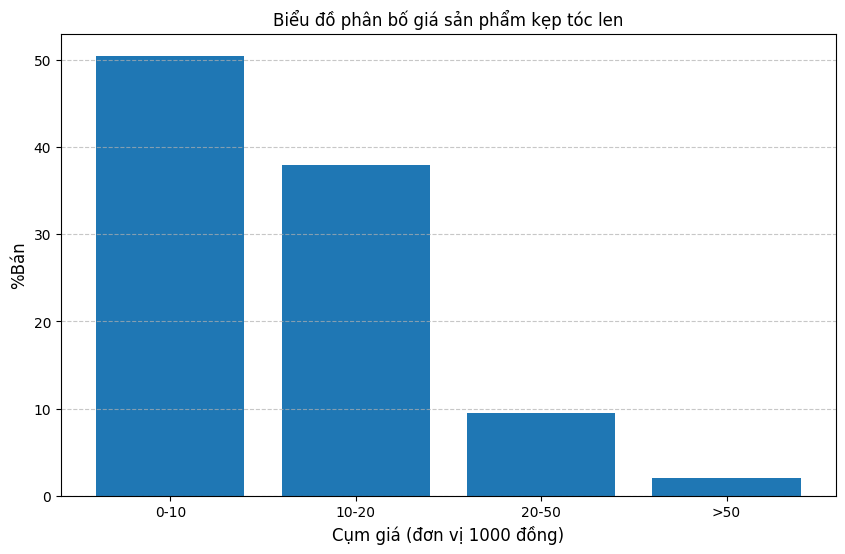

In [76]:
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(cluter_data['Cụm giá'], cluter_data['%Bán'])
plt.title('Biểu đồ phân bố giá sản phẩm kẹp tóc len')
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [77]:
data_hoa = data = pd.read_csv(r'H:\My Drive\01.UIT\HK6\hoa_len.csv')

In [91]:
data_hoa.head()
name_of_bar = "Biểu đồ phân bố giá sản phẩm hoa trang trí bằng len"


In [87]:
data_hoa.describe()

,Ảnh,Giá,Bán,Doanh thu
count,0.0,98.000000,98.000000,9.800000e+01
mean,NaN,78.620337,312.642857,7.934592e+06
std,NaN,73.333487,1230.532206,2.714776e+07
min,NaN,4.800000,1.000000,8.911000e+03
25%,NaN,26.925000,3.000000,1.862500e+05
50%,NaN,55.000000,8.000000,7.000000e+05
75%,NaN,96.500000,74.500000,2.395250e+06
max,NaN,300.000000,9130.000000,2.332715e+08


In [92]:
def number_cluster_hoa(price):
    if price <= 20:
        return "0-10"
    elif price > 20 and price <= 50:
        return "20-50"
    elif price > 50:
        return ">50"

In [99]:
def model_analyst_shopee(data,name_of_bar):
    data['Giá'] = pd.to_numeric(data['Giá'], errors='coerce')
    data['Bán'] = pd.to_numeric(data['Bán'], errors='coerce')
    data['Cụm giá'] = data['Giá'].apply(number_cluster_hoa)
    cluter_data = data.groupby('Cụm giá').agg({'Bán':'sum','Doanh thu':'sum' }).reset_index()
    total_product_sold = cluter_data['Bán'].sum()
    cluter_data['%Bán'] = (cluter_data['Bán']/total_product_sold)*100
    # vẽ biểu đồ
    plt.figure(figsize=(10,6))
    plt.bar(cluter_data['Cụm giá'], cluter_data['%Bán'])
    plt.title(name_of_bar)
    plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
    plt.ylabel('%Bán', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

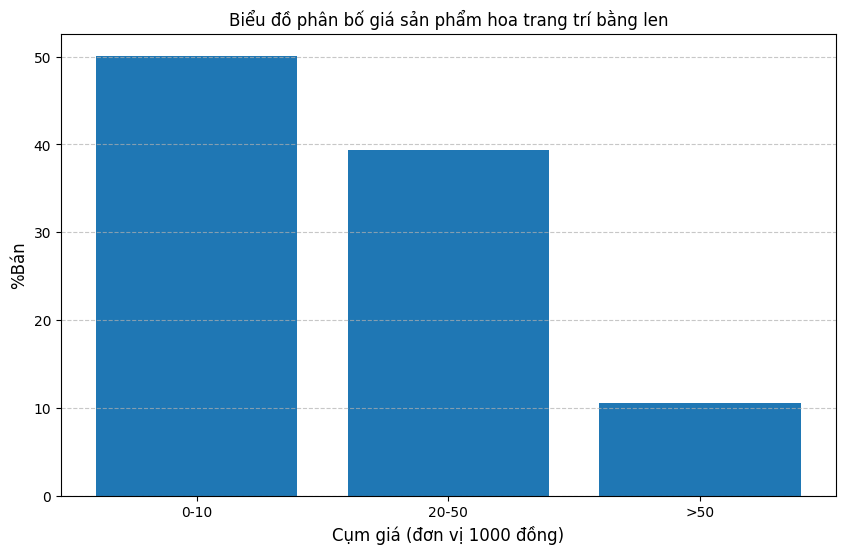

In [100]:
name_of_bar = "Biểu đồ phân bố giá sản phẩm hoa trang trí bằng len"
model_analyst_shopee(data_hoa,name_of_bar)

In [103]:
data_moc_khoa = pd.read_csv(r'H:\My Drive\01.UIT\HK6\moc_khoa.csv')
mockhoa = " Biểu đồ phân bố giá sản phẩm móc khóa"

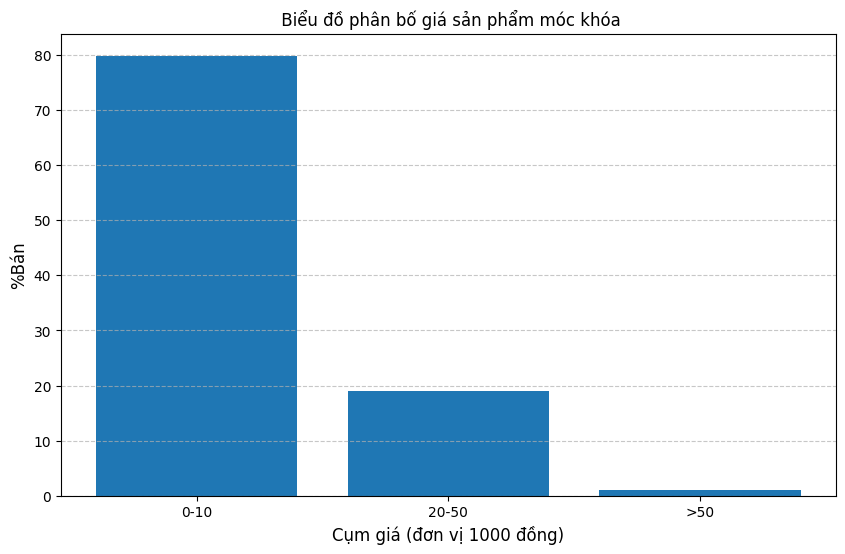

In [104]:
model_analyst_shopee(data_moc_khoa,mockhoa)